In [51]:
import pickle
import numpy as np
from config import *

pickle_file = 'observations_0.pkl'

with open(pickle_file, 'rb') as file:
    data = pickle.load(file)
for row in data[1:100]:
    print(row)

[ 0.08560084  0.39325197 -0.32106306 -0.38005953 -0.38747658]
[ 0.25482458  0.33553234 -0.42309335 -0.56662807 -0.58206134]
[ 0.43858049  0.1417606  -0.23489265 -0.75546    -0.76512986]
[ 0.60565744  0.12135072 -0.04212546 -0.94854112 -0.68492103]
[ 0.79551157  0.32087807  0.12888895 -1.14695964 -0.63448708]
[ 0.99549467  0.20047373  0.28124369 -1.33651066 -0.81039709]
[ 0.93202332  0.39178858  0.45170065 -1.51800582 -0.96189999]
[ 1.10665525  0.58990642  0.26565196 -1.33203786 -1.13468768]
[ 0.965959    0.77743853  0.07954333 -1.14739972 -1.2541408 ]
[ 1.10823376  0.9669678  -0.07794351 -0.9571304  -1.05620576]
[ 1.25661035  0.79215975  0.12698857 -1.13510082 -0.86024168]
[ 1.05367035  0.60614779  0.30576182 -1.28398527 -0.66614722]
[ 1.15863146  0.40049925  0.44707927 -1.09157838 -0.85756448]
[ 0.9645047   0.20438942  0.55722713 -0.88487323 -0.6767182 ]
[ 0.8620324   0.39740643  0.69835144 -1.05593432 -0.85969315]
[ 0.98802458  0.59014135  0.49443312 -1.23780195 -1.03187477]
[ 1.0972

In [41]:
with open('observations_0.pkl', 'rb') as f:
    joint_readings = pickle.load(f)[1:]

In [42]:
def convert_to_dxl_position(joint_angles):
    """
    Convert joint angles to Dynamixel positions.
    Assuming joint_angles are in radians and need to be mapped to Dynamixel positions.
    """
    dxl_positions = []
    for angle in joint_angles:
        position = int((angle + np.pi) / (2 * np.pi) * 4095)
        position = np.clip(position, 0, 4095)
        dxl_positions.append(position)
    return dxl_positions

In [43]:
for joint_angles in joint_readings:
    joint_positions = convert_to_dxl_position(joint_angles)

In [44]:
joint_positions

[2635, 2366, 2037, 1425, 1363]

In [39]:
joint_angles

array([ 0.90252891,  0.49000886, -0.0159563 , -0.95506572, -1.05011697])

In [48]:
# dxl_positions for all values of joint_angles
dxl_positions = []
for joint_angles in joint_readings:
    dxl_positions.append(convert_to_dxl_position(joint_angles))

dxl_positions

[[2103, 2303, 1838, 1799, 1794],
 [2213, 2266, 1771, 1678, 1668],
 [2333, 2139, 1894, 1555, 1548],
 [2442, 2126, 2020, 1429, 1601],
 [2565, 2256, 2131, 1299, 1633],
 [2696, 2178, 2230, 1176, 1519],
 [2654, 2302, 2341, 1058, 1420],
 [2768, 2431, 2220, 1179, 1307],
 [2677, 2554, 2099, 1299, 1230],
 [2769, 2677, 1996, 1423, 1359],
 [2866, 2563, 2130, 1307, 1486],
 [2734, 2442, 2246, 1210, 1613],
 [2802, 2308, 2338, 1336, 1488],
 [2676, 2180, 2410, 1470, 1606],
 [2609, 2306, 2502, 1359, 1487],
 [2691, 2432, 2369, 1240, 1374],
 [2762, 2307, 2243, 1359, 1264],
 [2734, 2403, 2124, 1484, 1176],
 [2622, 2267, 2028, 1606, 1166],
 [2735, 2372, 1936, 1717, 1310],
 [2853, 2508, 2068, 1597, 1435],
 [2822, 2396, 2188, 1474, 1563],
 [2825, 2266, 2292, 1345, 1440],
 [2708, 2140, 2401, 1233, 1331],
 [2650, 2262, 2279, 1362, 1229],
 [2777, 2392, 2148, 1488, 1195],
 [2674, 2509, 2037, 1606, 1311],
 [2790, 2630, 1930, 1728, 1449],
 [2670, 2516, 2054, 1613, 1581],
 [2792, 2385, 2169, 1480, 1483],
 [2790, 22

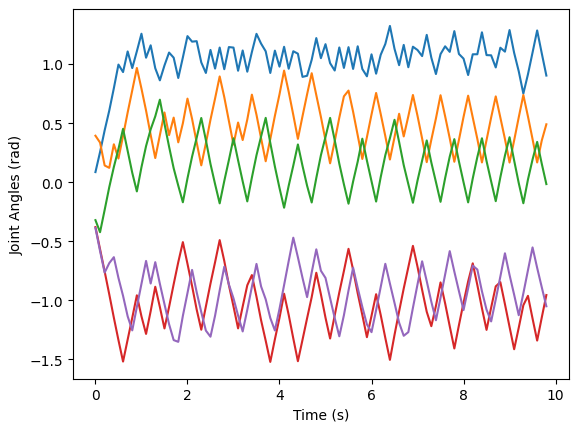

In [50]:
import matplotlib.pyplot as plt
# plot the joint angles against time which is index of list divided by 10
plt.plot([i/10 for i in range(len(joint_readings))], joint_readings)
plt.xlabel('Time (s)')
plt.ylabel('Joint Angles (rad)')
plt.show()